<img style="float: center;" src='https://avatars.githubusercontent.com/u/121973992?s=400&u=0cd6b57216ab047c8b7b93b26a6e91f1d29d719d&v=4' alt="goals_logo" width="90px"/> 

<a id="title_ID"></a>
# CAFE tutorial on 1D spectral fit #

**Author**: Thomas Lai & Tanio Diaz-Santos
<br>
**Last Updated**: Dec. 8, 2023

<hr style="border:1px solid gray"> </hr>

1.<font color='white'>-</font>Imports <a class="anchor" id="intro"></a>
------------------

In [1]:
import os
import sys
import zipfile
import site
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker
from matplotlib.backends.backend_pdf import PdfPages
from astropy.utils.data import download_file

from astropy.io import ascii
from astropy.table import Table
from astropy.table import QTable

import CAFE
import CRETA
from CAFE.cafe_io import *
from CAFE.cafe_helper import *

import CAFE.cafe as cafe
import CRETA.creta as creta

# %matplotlib widget


User API Created


2.<font color='white'>-</font>Download the MIRI IFU extracted 1D spectrum and use it as the input of the CAFE fit<a class="anchor" id="intro"></a>
------------------

In [2]:
# Create folders for input/output data
data_path = './input_spec/'
output_path = './cafe_output/'

if not os.path.exists(data_path):
    os.makedirs(data_path)
else:
    print("Input folder already exists.")

if not os.path.exists(output_path):
    os.makedirs(output_path)
else:
    print("Output folder already exists.")

Input folder already exists.
Output folder already exists.


** Download the spectrum ** <br>
Download the NGC 7469 1D spectrum from BOX
https://caltech.box.com/s/ss61vynjd51o5211llrefu9bl2e8mx4z and save the data under ./input_spec/.
<br>


In [20]:
# set the Box link and file name
link = 'https://caltech.box.com/shared/static/ltioy181o3lkwxejizn4qy5bccs0dsc3.dat'
filename = 'NGC7469_SingleExt_r1.5as.dat'
if not os.path.isfile(os.path.join(filename)):
    print('Downloading {}...'.format(filename))
    demo_file = download_file(link, cache=True)
    # Make a symbolic link using a local name for convenience
    os.symlink(demo_file, filename) #os.path.join(output_dir, filename))
else:
    print('{} already exists, skipping download...'.format(filename))

NGC7469_SingleExt_r1.5as.dat already exists, skipping download...


2.<font color='white'>-</font>CAFE Configuration <a class="anchor" id="intro"></a>
------------------

In [9]:
# Get CAFE directory from site-packages
cafe_dir = site.getsitepackages()[0]+'/CAFE/'
creta_dir = site.getsitepackages()[0]+'/CRETA/'

3.<font color='white'>-</font>CAFE FITTING <a class="anchor" id="intro"></a>
------------------

Load data: ./input_spec/NGC7469_SingleExt_r1.5as.dat
Generating continuum profiles for guess model from the .ini file
Parameter object has 84 lines, 29 PAHs, 5 extra opacity features, and 42 continuum parameters
ISRF
ISRF


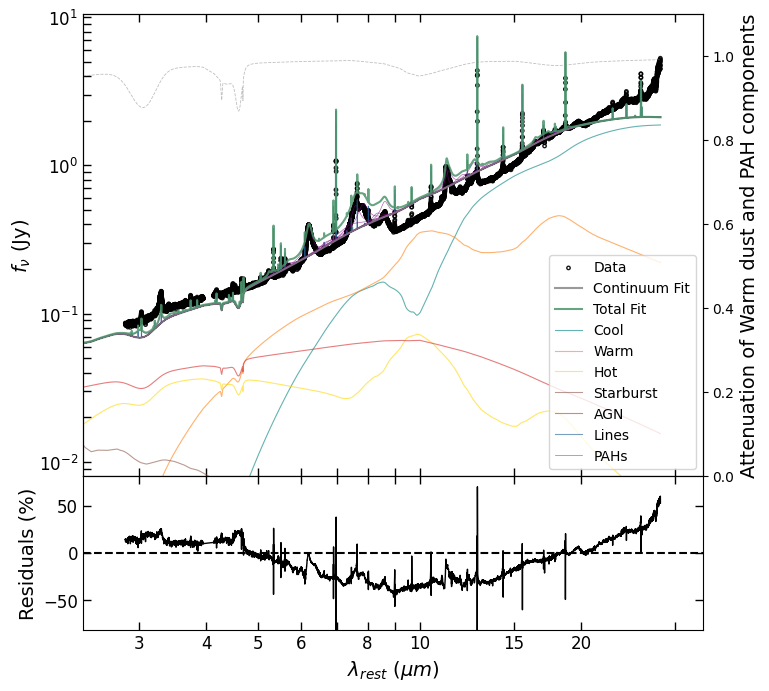

In [16]:
# Set the redshift of the source
z = 0.0163

# Setup data directory and file name, and parameter files.
source_fd = './input_spec/'
source_fn = 'NGC7469_SingleExt_r1.5as.dat'
#source_fnb = source_fn.split('.fits')[0].replace('.','')

inppar_fn = cafe_dir+'inp_parfiles/inpars_jwst_nirspec-miri_AGN.ini'
optpar_fn = cafe_dir+'opt_parfiles/default_opt.cafe'

# Initialize the CAFE fitting module
s = cafe.specmod(cafe_dir)

# Read in the spec
s.read_spec(source_fn, file_dir=source_fd, z=z)

# Preview the spectrum and overlay the initial params
s.plot_spec_ini(inppar_fn, optpar_fn)

In [17]:
# Fit the spectrum
s.fit_spec(inppar_fn, optpar_fn)

Generating parameter cube with initial/full parameter object
Parameter object has 112 lines, 29 PAHs, 5 extra opacity features, and 42 continuum parameters
Generating parameter object
Parameter object has 84 lines, 29 PAHs, 5 extra opacity features, and 42 continuum parameters
Generating continuum profiles
ISRF
ISRF
0.64 seconds to make continnum profiles
Fitting 388 parameters
Iteration 1/5(max): 2023-12-12 12:23:24.162758 -----------------
True in 9079 steps
119.85 seconds elapsed
<Parameter 'g_H200S6_61088N_Peak', value=9.853062136953486e-06 +/- 0.0145, bounds=[0.0:inf]> at lower bound, fixing to 0.0
<Parameter 'g_SiVII_64922B_Wave', value=6.481372876600826 +/- 0.0117, bounds=[6.481372448298866:6.503027551701135]> at lower bound, fixing to 6.481372448298866
<Parameter 'g_SiVII_64922B_Gamma', value=0.006671097518869656 +/- 0.00437, bounds=[0.00025791269889028636:0.0066711140760507]> at upper bound, fixing to 0.0066711140760507
<Parameter 'g_ArIII_218302N_Peak', value=6.85267330878354

FileNotFoundError: [Errno 2] No such file or directory: '/Users/thomaslai/opt/anaconda3/envs/cafe_env/lib/python3.11/site-packages/CAFE/output/NGC7469_SingleExt_r15as/NGC7469_SingleExt_r15as_parcube.fits'

In [12]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])
print(s.parcube['VALUE'].data[-1,0,0]/2.998e5)

5.889308142985247
1.9644123225434448e-05


ISRF
ISRF


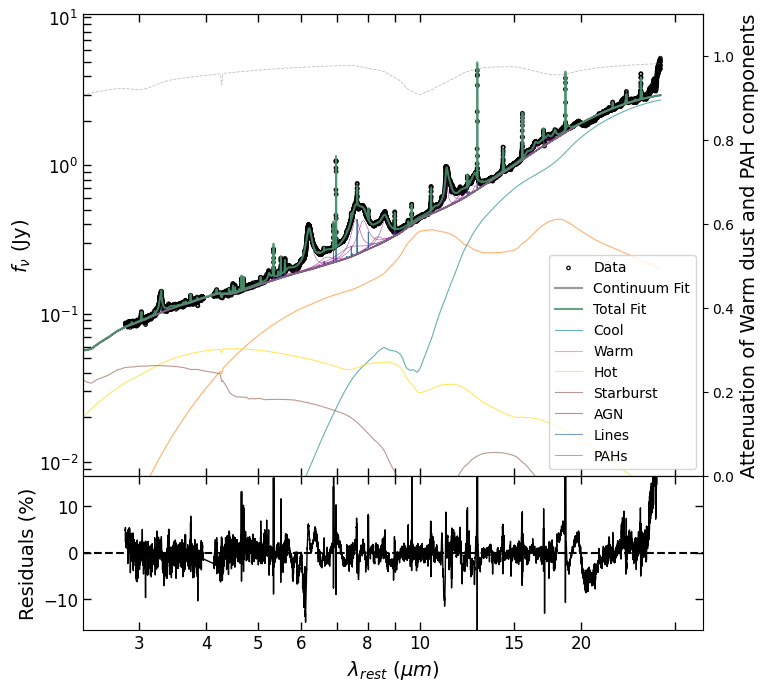

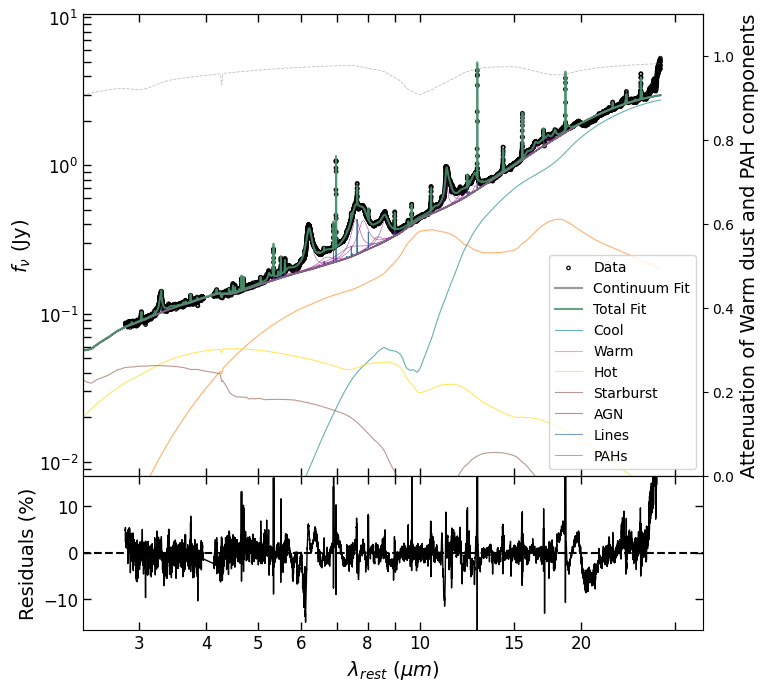

In [18]:
# Plot fitted spectrum
s.plot_spec_fit(inppar_fn, optpar_fn)

In [14]:
from astropy.io import ascii
from astropy.table import Table
from astropy.table import QTable

# Read output PAH table. Flux in unit W/m^2.
pah = cafeio.pah_table(s.parcube, 0, 0)

# Read output line table. Flux in unit W/m^2.
line = cafeio.line_table(s.parcube, 0, 0)

#pah33 = pah[pah.index == 'PAH33'].pah_strength.values[0]
#pah33_unc = pah[pah.index == 'PAH33'].pah_strength_unc.values[0]
pah62 = pah[pah.index == 'PAH62'].pah_strength.values[0]
pah62_unc = pah[pah.index == 'PAH62'].pah_strength_unc.values[0]
pah77 = pah[pah.index == 'PAH77_C'].pah_strength.values[0]
pah77_unc = pah[pah.index == 'PAH77_C'].pah_strength_unc.values[0]
pah86 = pah[pah.index == 'PAH86'].pah_strength.values[0]
pah86_unc = pah[pah.index == 'PAH86'].pah_strength_unc.values[0]
pah113 = pah[pah.index == 'PAH113_C'].pah_strength.values[0]
pah113_unc = pah[pah.index == 'PAH113_C'].pah_strength_unc.values[0]
pah170 = pah[pah.index == 'PAH170_C'].pah_strength.values[0]
pah170_unc = pah[pah.index == 'PAH170_C'].pah_strength_unc.values[0]
#raise

x = pah62 / pah77 
x_unc = pah62 / pah77 * np.sqrt((pah62_unc/pah62)**2 + (pah77_unc/pah77)**2)
y = pah113 / pah77
y_unc = pah113 / pah77 * np.sqrt((pah113_unc/pah113)**2 + (pah77_unc/pah77)**2)

print('6.2/7.7 = {} +/- {}'.format(x, x_unc))
print('11.3/7.7 = {} +/- {}'.format(y, y_unc))

print(pah)

# Make an astropy table 
t = QTable([pah.index.values, pah.pah_strength, pah.pah_strength_unc],
           names = ('pah_complex', 'pah_strength', 'pah_strength_unc'),
           meta={'wavelength': 'micron',
                 'flux': 'W/m^2',
                }
          )

# Write PAH table in an .ecsv file
#t.write('./NGC7469_pah_tbl.ecsv', overwrite=False)

6.2/7.7 = 0.30285356411749365 +/- 0.02334794600734866
11.3/7.7 = 0.6418280649364256 +/- 0.04997610681886842
             pah_strength  pah_strength_unc
pah_complex                                
PAH113_C     1.824062e-14      1.169501e-15
PAH120       3.303850e-15      3.719366e-16
PAH126_C     7.254412e-15      5.538638e-16
PAH136       0.000000e+00      0.000000e+00
PAH142       3.062777e-16      9.376342e-17
PAH164       1.634175e-15      1.527258e-16
PAH170_C     8.606467e-15      7.468908e-16
PAH33        3.177182e-15      3.040368e-16
PAH62        8.607035e-15      5.437523e-16
PAH77_C      2.841979e-14      1.255703e-15
PAH83        3.005049e-15      3.225361e-16
PAH86        8.322249e-15      7.025732e-16
ali34        2.447215e-16      1.812591e-16
ali345       6.744877e-16      2.786292e-16


/Users/thomaslai/opt/anaconda3/envs/cafe_env/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/thomaslai/opt/anaconda3/envs/cafe_env/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/thomaslai/opt/anaconda3/envs/cafe_env/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/thomaslai/opt/anaconda3/envs/cafe_env/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [21]:
pwd

'/Users/thomaslai/Documents/astro/CAFE/CAFE_tutorial/CAFE_tutorial_Aug2023/notebooks'